# Plots for differentiation <a class="anchor" id="top"></a>
Plots of:
+ [temperature](#temp)
+ [Rayleigh number](#rayleigh)
+ [Critical rayleigh number](#critical-rayleigh)
+ [Convecting cells](#convecting)
+ [density](#density)
+ [thermal conductivity](#thermal)
+ [% iron melted](#iron)
as a function of time for the differentiation stage of evolution.

## Set-up

In [1]:
#import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#scale time to Myr
from parameters import Myr, r, Tm0, dr

Choose run and whether you want to save figure

In [2]:
run=9
save = True # do you want to save your figures?

Load npz files

In [3]:
npzfile = np.load(f'Results/diff_run_{run}.npz')
T = npzfile['Tdiff'] 
rho = npzfile['rho_profile']
k = npzfile['k_profile'] 
iron = npzfile['Xfe']
t = npzfile['t_diff'] 
Ra = npzfile['Ra']
Ra_crit = npzfile['Ra_crit']
convect = npzfile['convect']

Scale time, choose whether or not to plot logarithmically

In [4]:
t_plot = t/Myr
log_time = True # do you want to plot time logarithmically
dt = 1 #for now plot everything in units of timestep

## Temperature <a class="anchor" id="temp"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

Initial temperature profiles

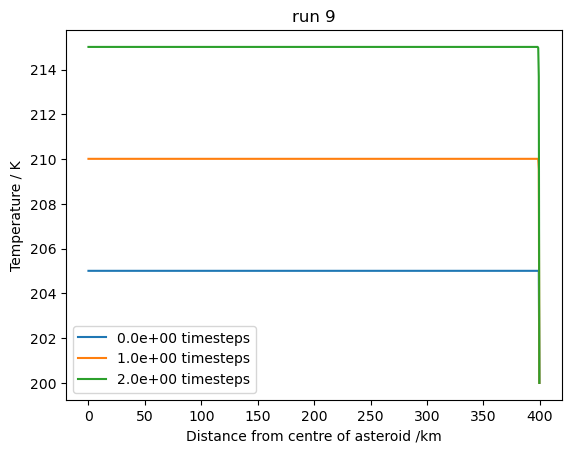

In [5]:
plt.figure()
rplot= np.arange(0,r,dr)
for i in range(3):
    plt.plot(rplot/1e3, T[:,i],label=f'{i*dt:.1e} timesteps') #approximate temp profile times
plt.xlabel('Distance from centre of asteroid /km')
plt.ylabel('Temperature / K')
plt.title('run {}'.format(run))
plt.legend()
if save == True:
    plt.savefig('Plots/run_{}_initial_temp.png'.format(run))

Temperature profiles through the whole simulation

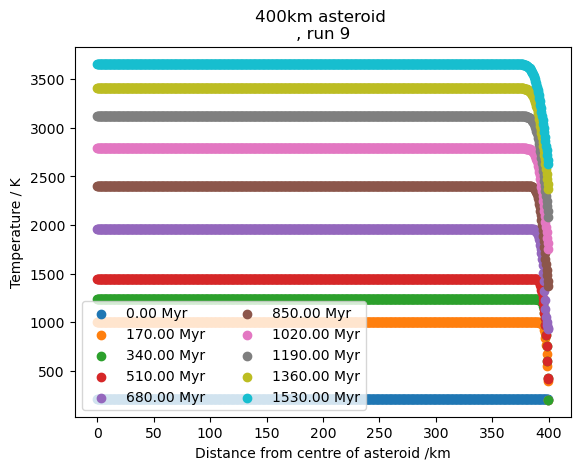

In [6]:
plt.figure()
rplot= np.arange(0,r,dr)
n = np.shape(T)[1]
n_plot = 10 #how many plots do you want
for i in range(n_plot):
    plt.scatter(rplot/1e3, T[:,i*int(n/n_plot)],label='{:.2f} Myr'.format(i*int(n/n_plot))) #approximate temp profile times
plt.xlabel('Distance from centre of asteroid /km')
plt.ylabel('Temperature / K')
plt.title(f'{r/1e3:.0f}km asteroid \n, run {run}')
plt.legend(ncol=2,loc='lower left')
#plt.vlines(2,ymin=1590,ymax=1625,linestyle='--',color='black')
#plt.xlim([0,210])
#plt.xlim([0,25])
#plt.ylim([1595,1615])
if save == True:
    plt.savefig('Plots/run{}_Tprofile.png'.format(run))

In [7]:
import matplotlib.colors as mcolors

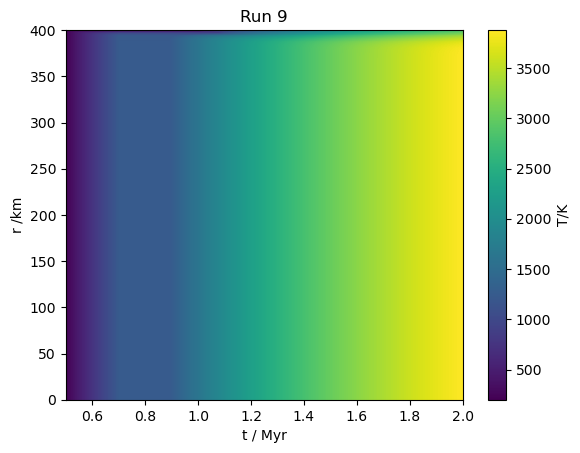

In [8]:
plt.figure()
plt.pcolormesh(t/Myr, rplot/1e3,T,shading = 'nearest') # use same vmin and vmax as other plots to make them comparable
#plt.yscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.ylim([0,400])
plt.colorbar(label='T/K')
plt.title(f'Run {run}')
if save == True:
    plt.savefig(f'Plots/Tdiff_run{run}.png')

Slightly hotter but not ridiculously hotter.


## Rayleigh number<a class="anchor" id="rayleigh"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [9]:
#Create an array of edges for plotting
t_edge = (t[:-1]+t[1:])/2
dt = t[1]-t[0]
t_edge = np.append(t_edge,t_edge[-1]+dt)
t_edge = np.insert(t_edge,0,t_edge[0]-dt)

r_edge = (rplot[:-1]+rplot[1:])/2
dr = rplot[1]-rplot[0]
r_edge = np.append(r_edge,r_edge[-1]+dr)
r_edge = np.insert(r_edge,0,r_edge[0]-dr)

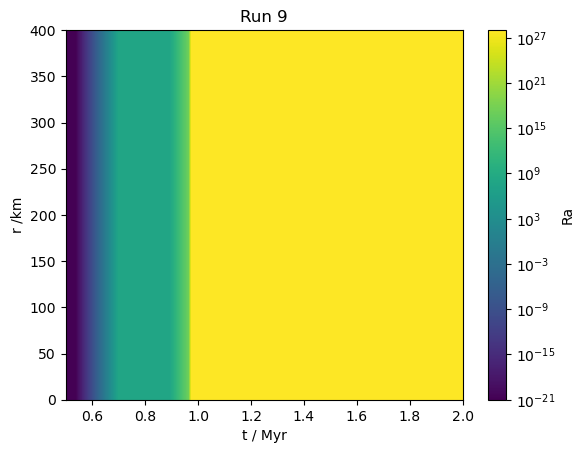

In [10]:
plt.figure()
plt.pcolormesh(t_edge/Myr, r_edge/1e3,Ra,norm=mcolors.LogNorm(vmax=1e28,vmin=1e-21)) # use same vmin and vmax as other plots to make them comparable
#plt.yscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.ylim([0,400])
plt.colorbar(label='Ra')
plt.title(f'Run {run}')
if save == True:
    plt.savefig(f'Plots/Ra_diff_run{run}.png')

None of the elements are zero, nan or infinity so not sure what the white bits are. Only appears when pass the LogNorm argument but there is nothing which should be upsetting it so a bit confused. Switching shading from nearest to flat made no difference.

In [11]:
np.where(np.nonzero(Ra)== False)

(array([], dtype=int64),)

In [12]:
np.where(np.isnan(Ra)== True)

(array([], dtype=int64), array([], dtype=int64))

In [13]:
np.where(np.isinf(Ra)== True)

(array([], dtype=int64), array([], dtype=int64))

In [14]:
np.where(Ra<0)

(array([], dtype=int64), array([], dtype=int64))

## Critical Rayleigh number<a class="anchor" id="critical-rayleigh"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

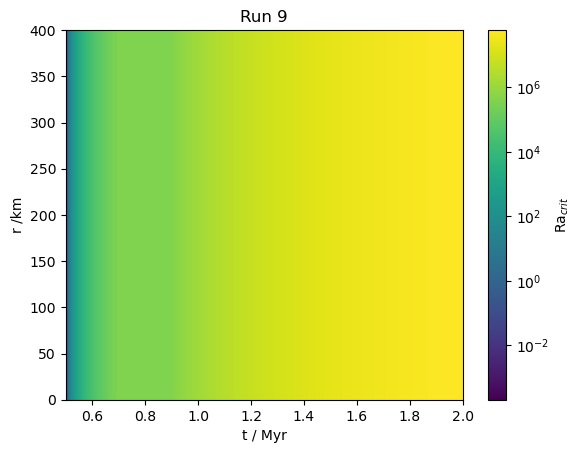

In [15]:
plt.figure()
plt.pcolormesh(t/Myr, rplot/1e3,Ra_crit,shading = 'nearest',norm=mcolors.LogNorm()) # use same vmin and vmax as other plots to make them comparable
#plt.yscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.ylim([0,400])
plt.colorbar(label='Ra$_{crit}$')
plt.title(f'Run {run}')
if save == True:
    plt.savefig(f'Plots/Racrit_diff_run{run}.png')

Critical Rayleigh number seems to vary over many orders of magnitude and change with time. Reading suggests it is $O(10^3)$ and should be affected by the viscosity contrast between the top and bottom of the cell but not enough to cause 15 orders of magnitude variation.

## Convecting cells<a class="anchor" id="convecting"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

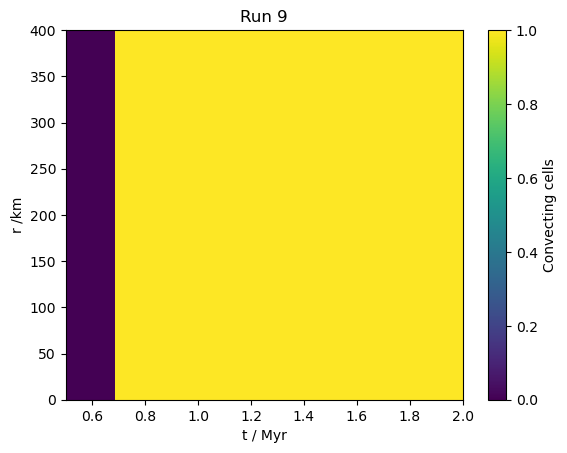

In [16]:
plt.figure()
plt.pcolormesh(t/Myr, rplot/1e3,convect,shading = 'nearest') # use same vmin and vmax as other plots to make them comparable
#plt.yscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.ylim([0,400])
plt.title(f'Run {run}')
plt.colorbar(label='Convecting cells')
if save == True:
    plt.savefig(f'Plots/convect_run{run}.png')

1= True, 0 = False. For Dodds implementation (run 6) everything seems to start convecting around 0.9 Myr except a few cells. If you don't differentiate and the body continues to heat up then Ra$_{\rm crit}$ increases again so convective region appears to decrease. Adding melting at the eutectic delayed this by about 0.2 Myr. For R&N implementation everything differentiates at once.

## Density <a class="anchor" id="density"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

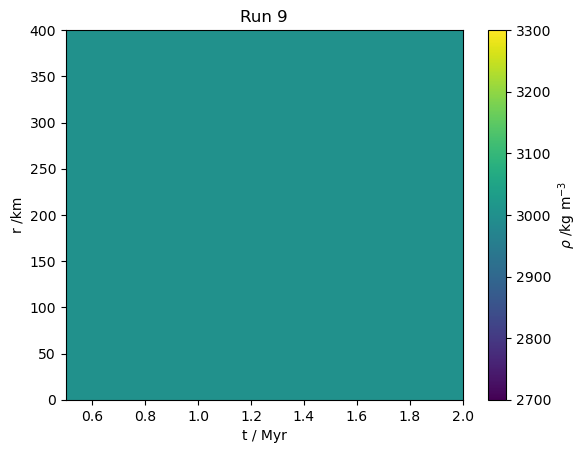

In [17]:
plt.figure()
plt.pcolormesh(t/Myr, rplot/1e3,rho,shading = 'nearest') # use same vmin and vmax as other plots to make them comparable
#plt.yscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.ylim([0,400])
plt.title(f'Run {run}')
plt.colorbar(label='$ \\rho$ /kg m$^{-3}$')

## Thermal conductivity <a class="anchor" id="k"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

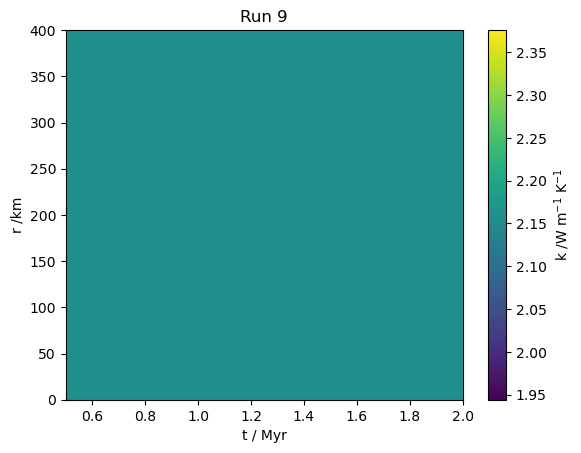

In [18]:
plt.figure()
plt.pcolormesh(t/Myr, rplot/1e3,k,shading = 'nearest') # use same vmin and vmax as other plots to make them comparable
#plt.yscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.ylim([0,400])
plt.title(f'Run {run}')
plt.colorbar(label='k /W m$^{-1}$ K$^{-1}$')


## Melted iron content <a class="anchor" id="iron"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

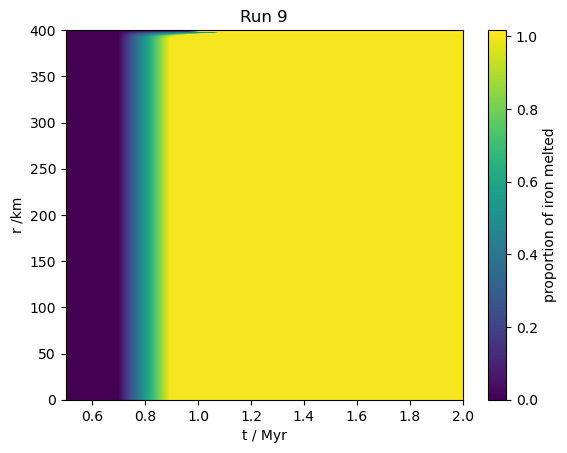

In [19]:
plt.figure()
plt.pcolormesh(t/Myr, rplot/1e3,iron,shading = 'nearest') # use same vmin and vmax as other plots to make them comparable
#plt.yscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.ylim([0,400])
plt.title(f'Run {run}')
plt.colorbar(label='proportion of iron melted')